# 📔 Girlfriend Acquisition Predictor - Notebook

This notebook walks through the process of building a machine learning model to predict the likelihood of getting a girlfriend in college. We will cover:

- **Setup**: Importing libraries  
- **Data Generation**: Creating a realistic synthetic dataset  
- **Exploratory Data Analysis (EDA)**: Understanding our data through visualizations  
- **Preprocessing & Training**: Preparing the data and training a Logistic Regression model  
- **Evaluation**: Assessing the model's performance  
- **Simulation**: Using the trained model to make a prediction on new data  


In [1]:
# 📦 Cell 1: Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")


In [2]:
# 🧪 Cell 2: Data Generation Function

def generate_synthetic_data(num_samples=1000):
    """
    Generates a synthetic dataset based on relatable college-life features.
    """
    events_attended = np.random.randint(0, 25, size=num_samples)
    canteen_hours = np.random.uniform(0, 20, size=num_samples)
    github_to_instagram_ratio = np.random.uniform(0.1, 5.0, size=num_samples)
    reply_rate = np.random.uniform(0.05, 0.95, size=num_samples)
    uniform_wrinkle_score = np.random.uniform(0, 10, size=num_samples)
    dept_similarity_index = np.random.randint(0, 2, size=num_samples)
    friend_zone_flag = np.random.randint(0, 2, size=num_samples)
    crush_eye_contact_count = np.random.choice([0, 1, 2, 3, 4, 5], size=num_samples, p=[0.85, 0.05, 0.04, 0.03, 0.02, 0.01])

    score = (
        (events_attended * 0.08) + (canteen_hours * 0.1) + (reply_rate * 2.5) +
        (crush_eye_contact_count * 0.5) + (dept_similarity_index * 0.5) -
        (uniform_wrinkle_score * 0.2) - (friend_zone_flag * 3.0) -
        (np.abs(github_to_instagram_ratio - 1.2) * 0.5)
    )
    probability = 1 / (1 + np.exp(-score))
    girlfriend_status = (probability > np.random.uniform(0, 1, size=num_samples)).astype(int)

    df = pd.DataFrame({
        'events_attended': events_attended, 'canteen_hours': canteen_hours,
        'github_to_instagram_ratio': github_to_instagram_ratio, 'reply_rate': reply_rate,
        'uniform_wrinkle_score': uniform_wrinkle_score, 'dept_similarity_index': dept_similarity_index,
        'friend_zone_flag': friend_zone_flag, 'crush_eye_contact_count': crush_eye_contact_count,
        'girlfriend_status': girlfriend_status
    })
    return df


In [3]:
# 📊 Cell 3: Create and Inspect the DataFrame

df = generate_synthetic_data(num_samples=500)
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (500, 9)


,events_attended,canteen_hours,github_to_instagram_ratio,reply_rate,uniform_wrinkle_score,dept_similarity_index,friend_zone_flag,crush_eye_contact_count,girlfriend_status
0,19,8.860685,0.420896,0.682214,8.725176,1,0,0,1
1,23,8.299896,2.448132,0.203395,5.391697,0,0,0,0
2,3,11.764545,1.446659,0.478437,2.101368,1,1,2,0
3,19,2.953545,1.154190,0.231155,6.073825,1,0,0,1
4,22,7.619230,0.373974,0.604100,6.184036,1,0,0,1


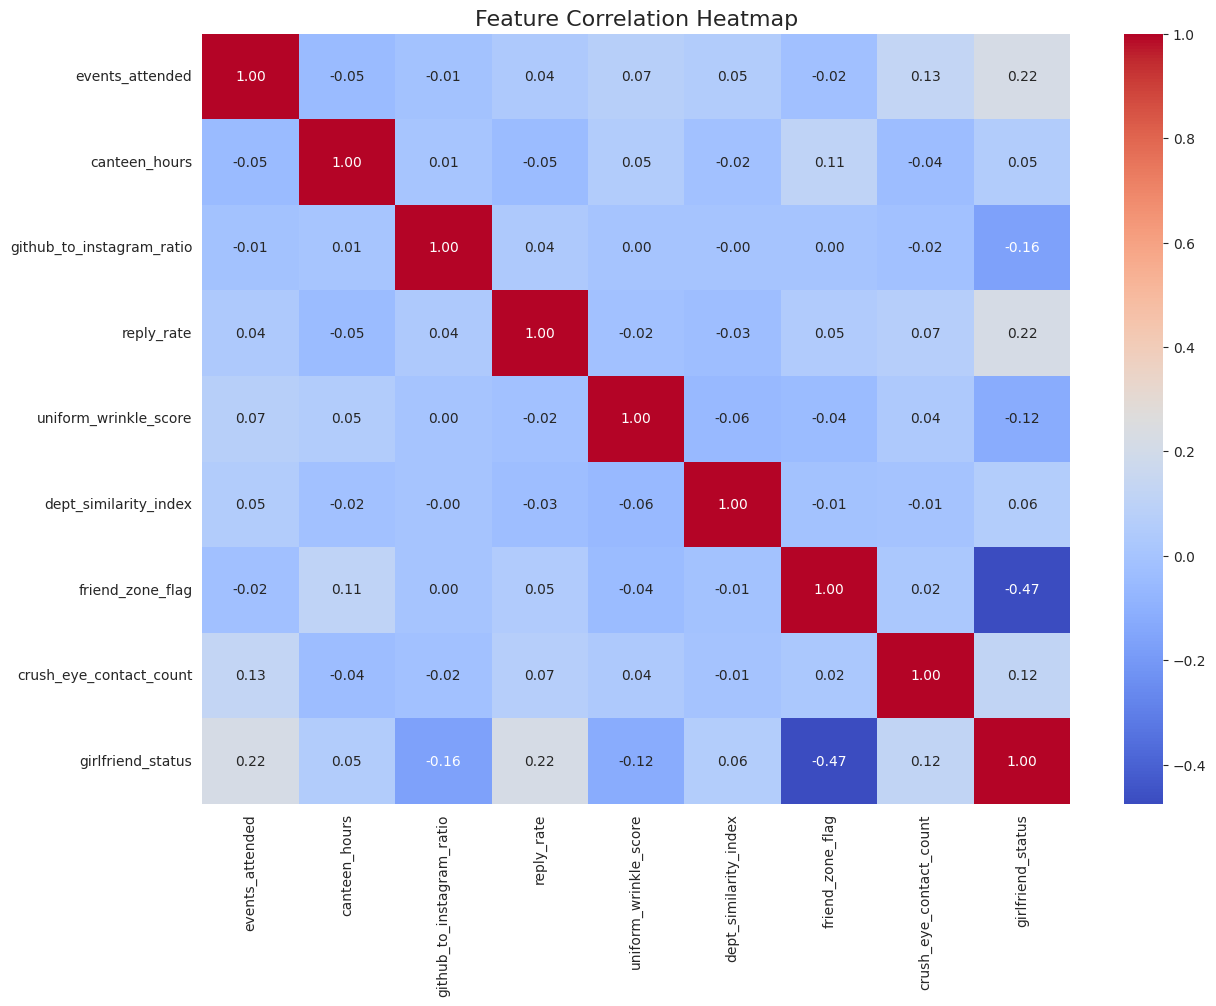

In [4]:
# 🔥 Cell 4: Exploratory Data Analysis (EDA) - Correlation Heatmap

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


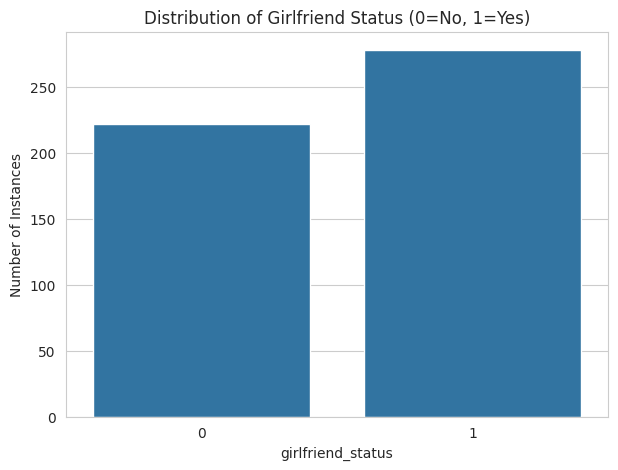

girlfriend_status
1    0.556
0    0.444
Name: proportion, dtype: float64


In [5]:
# 🎯 Cell 5: EDA - Target Variable Distribution

plt.figure(figsize=(7, 5))
sns.countplot(x='girlfriend_status', data=df)
plt.title('Distribution of Girlfriend Status (0=No, 1=Yes)')
plt.ylabel('Number of Instances')
plt.show()
print(df['girlfriend_status'].value_counts(normalize=True))


In [6]:
# ⚙️ Cell 6: Data Preprocessing and Splitting

# Define features (X) and target (y)
X = df.drop('girlfriend_status', axis=1)
y = df['girlfriend_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")


Training data shape: (400, 8)
Testing data shape: (100, 8)


In [7]:
# 🧠 Cell 7: Model Training

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Model training complete!")


Model training complete!


Model Accuracy: 76.00%

Classification Report:
              precision    recall  f1-score   support

       No GF       0.74      0.70      0.72        44
      Got GF       0.78      0.80      0.79        56

    accuracy                           0.76       100
   macro avg       0.76      0.75      0.76       100
weighted avg       0.76      0.76      0.76       100



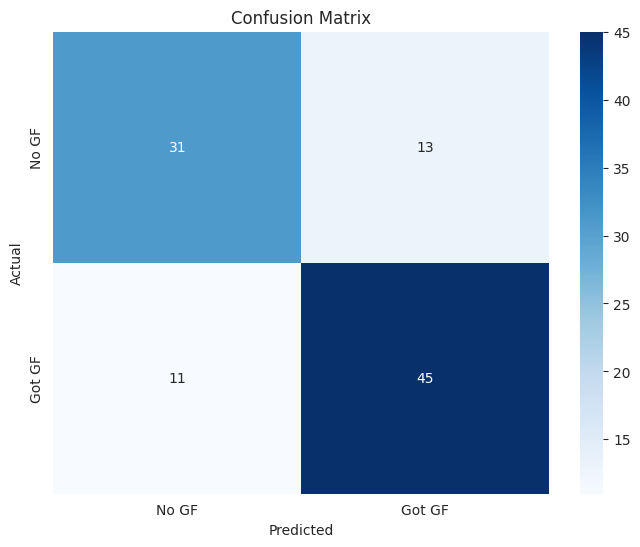

In [8]:
# 📈 Cell 8: Model Evaluation

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Print accuracy and classification report
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No GF', 'Got GF']))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No GF', 'Got GF'], yticklabels=['No GF', 'Got GF'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# 🎮 Cell 9: The Simulator

# --- YOUR TURN: Fill in your own stats here! ---
your_current_stats = {
    'events_attended': 10,
    'canteen_hours': 8,
    'github_to_instagram_ratio': 2.5,
    'reply_rate': 0.3,
    'uniform_wrinkle_score': 6,
    'dept_similarity_index': 1,
    'friend_zone_flag': 0,
    'crush_eye_contact_count': 0
}

# Convert stats to DataFrame and scale
input_df = pd.DataFrame([your_current_stats])
input_scaled = scaler.transform(input_df)

# Make prediction and get probabilities
prediction = model.predict(input_scaled)
prediction_proba = model.predict_proba(input_scaled)

# --- Display Result ---
result_text = "YES! The model predicts a high probability." if prediction[0] == 1 else "Not yet. The model predicts a low probability."

print("="*40)
print("      YOUR PERSONALIZED PREDICTION")
print("="*40)
print(f"Based on your stats, the prediction is: {result_text}")
print(f"Confidence [No, Yes]: [{prediction_proba[0][0]:.2f}, {prediction_proba[0][1]:.2f}]")
print("="*40)


      YOUR PERSONALIZED PREDICTION
Based on your stats, the prediction is: YES! The model predicts a high probability.
Confidence [No, Yes]: [0.34, 0.66]
